# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Jeselyn Tania
- **Email:** jeselyntan01@gmail.com
- **ID Dicoding:** sallychan

## Menentukan Pertanyaan Bisnis

- Bagaimana tren penggunaan sepeda sepanjang tahun?
- Apakah cuaca dan juga suhu dapat mempengaruhi jumlah peminjaman?

## Import Semua Packages/Library yang Digunakan

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [3]:
day_df = pd.read_csv('bike_data/day.csv')
hour_df = pd.read_csv('bike_data/hour.csv')

day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Memanggil beberapa library yang dibutuhkan untuk analisa data ini
- Serta menampilkan dataset tersebut dan mengecek apakah sudah berhasil ditampilkan atau belum

### Assessing Data

In [5]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [6]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [ ]:
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [ ]:
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [ ]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [ ]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


In [ ]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [ ]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [8]:
day_df[['dteday']].head()

,dteday
0,2011-01-01
1,2011-01-02
2,2011-01-03
3,2011-01-04
4,2011-01-05


**Insight:**
- Data nya sebernarnya sudah bersih. Data type sudah sesuai tidak ada duplikasi data, ataupun missing value
- hanya ganti pada kolom dteday menjadi tipe data datetime bukan object, dan menyesuaikan nama kolom lainnya saja agar mudah dibaca dengan menggunakan metode rename

### Cleaning Data

In [ ]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

In [9]:
day_df = day_df.rename(columns={'cnt': 'total_count', 'yr': 'year', 'mnth': 'month'})
hour_df = hour_df.rename(columns={'cnt': 'total_count', 'yr': 'year', 'mnth': 'month', 'hr': 'hour'})

In [10]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   instant      731 non-null    int64  
 1   dteday       731 non-null    object 
 2   season       731 non-null    int64  
 3   year         731 non-null    int64  
 4   month        731 non-null    int64  
 5   holiday      731 non-null    int64  
 6   weekday      731 non-null    int64  
 7   workingday   731 non-null    int64  
 8   weathersit   731 non-null    int64  
 9   temp         731 non-null    float64
 10  atemp        731 non-null    float64
 11  hum          731 non-null    float64
 12  windspeed    731 non-null    float64
 13  casual       731 non-null    int64  
 14  registered   731 non-null    int64  
 15  total_count  731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [11]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   instant      17379 non-null  int64  
 1   dteday       17379 non-null  object 
 2   season       17379 non-null  int64  
 3   year         17379 non-null  int64  
 4   month        17379 non-null  int64  
 5   hour         17379 non-null  int64  
 6   holiday      17379 non-null  int64  
 7   weekday      17379 non-null  int64  
 8   workingday   17379 non-null  int64  
 9   weathersit   17379 non-null  int64  
 10  temp         17379 non-null  float64
 11  atemp        17379 non-null  float64
 12  hum          17379 non-null  float64
 13  windspeed    17379 non-null  float64
 14  casual       17379 non-null  int64  
 15  registered   17379 non-null  int64  
 16  total_count  17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


**Insight:**
- Melakukan clearing data dengan menggantikan object menjadi datetime dan mengganti beberapa nama table

## Exploratory Data Analysis (EDA)

### Explore ...

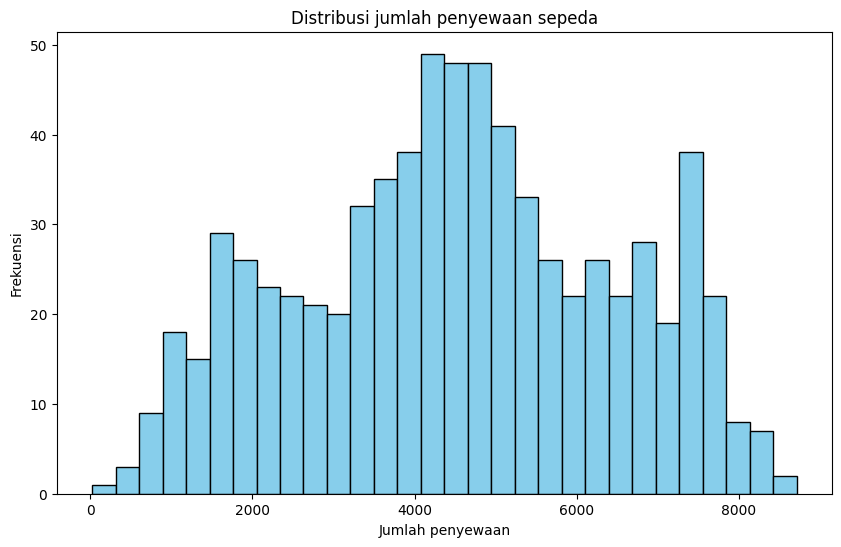

In [43]:
#Univariate Analysis ini nantinya buat distribusi total_count nya pakai bar chart

plt.figure(figsize=(10,6))
plt.hist(day_df['total_count'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribusi jumlah penyewaan sepeda')
plt.ylabel('Frekuensi')
plt.xlabel('Jumlah penyewaan')
plt.show()

In [47]:
#Outlier
day_df['total_count'].describe()

,total_count
count,731.000000
mean,4504.348837
std,1937.211452
min,22.000000
25%,3152.000000
50%,4548.000000
75%,5956.000000
max,8714.000000


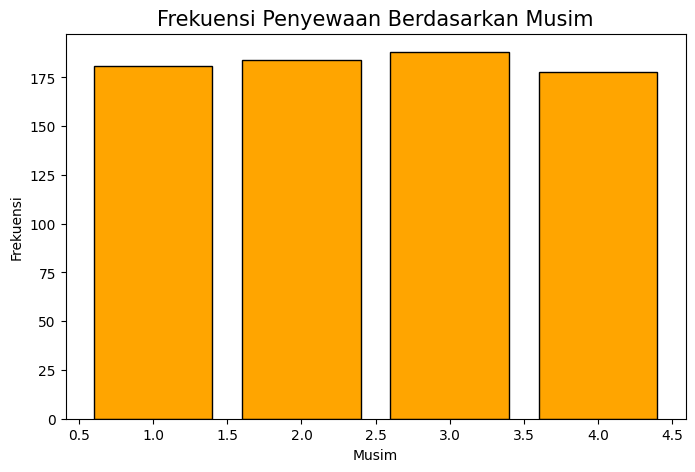

In [45]:
#Untuk season
plt.figure(figsize=(8,5))
plt.bar(day_df['season'].value_counts().index, day_df['season'].value_counts(), color='orange', edgecolor='black')
plt.title('Frekuensi Penyewaan Berdasarkan Musim', fontsize=15)
plt.xlabel('Musim')
plt.ylabel('Frekuensi')
plt.show()

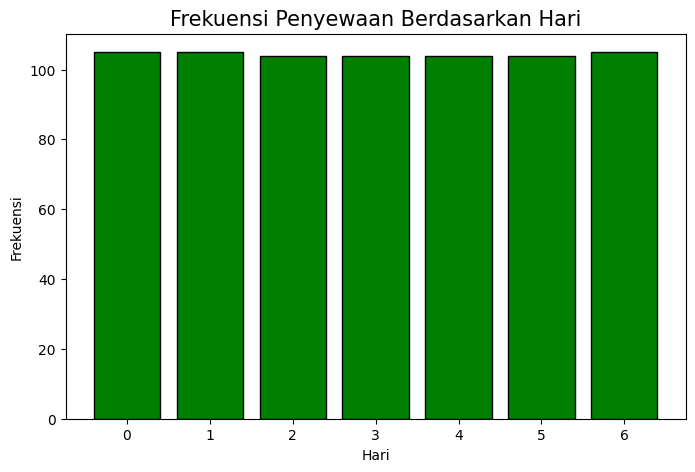

In [46]:
#Untuk hari
plt.figure(figsize=(8,5))
plt.bar(day_df['weekday'].value_counts().index, day_df['weekday'].value_counts(), color='green', edgecolor='black')
plt.title('Frekuensi Penyewaan Berdasarkan Hari', fontsize=15)
plt.xlabel('Hari')
plt.ylabel('Frekuensi')
plt.show()

**Insight:**
- Grafik menampilkan bahwa penyewaan sepeda paling tertinggi itu ada di musim panas dan juga hari kerja
- Ada juga dalam beberapa hari dengan lonjakan penggunaan yang signifikan di atas rata-rata penyewaan
- Penyewaan juga tetap stabil di akhir pekan

## Visualization & Explanatory Analysis

### Pertanyaan 1:

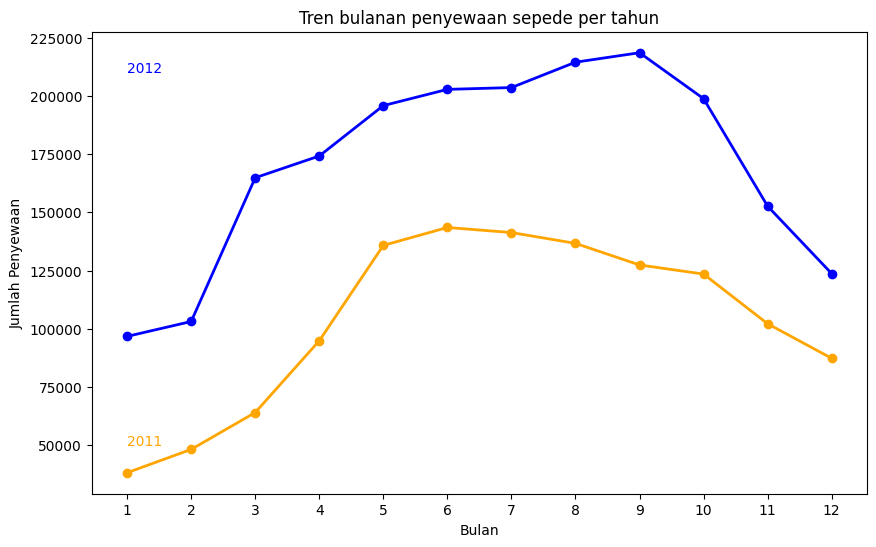

In [48]:
monthly_tren = day_df.groupby(['year', 'month'])['total_count'].sum().reset_index()
monthly_tren['year'] = monthly_tren['year'].map({0: 2011, 1: 2012}) #agar nanti outputnya itu berdasarkan tahun 0 adalah 2011 dan 1 adalah
plt.figure(figsize=(10,6))
plt.plot(
    monthly_tren[monthly_tren['year'] == 2011]['month'],
    monthly_tren[monthly_tren['year'] == 2011]['total_count'],
    marker='o', label='2011', color='orange', linewidth=2
)
plt.plot(
    monthly_tren[monthly_tren['year'] == 2012]['month'],
    monthly_tren[monthly_tren['year'] == 2012]['total_count'],
    marker='o', label='2012', color='blue', linewidth=2
)
plt.text(1, 210000, '2012', color='blue')
plt.text(1, 50000, '2011', color='orange')
plt.title('Tren bulanan penyewaan sepede per tahun')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Penyewaan')
plt.xticks(range(1,13))
plt.show()

### Pertanyaan 2:

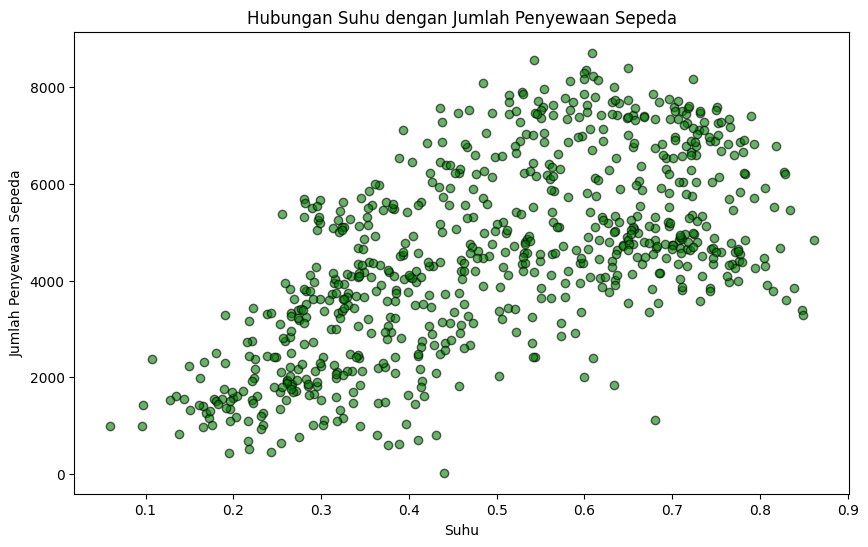

In [51]:
plt.figure(figsize=(10,6))
plt.scatter(day_df['temp'], day_df['total_count'], alpha=0.6, color='green', edgecolor='black')
plt.title('Hubungan Suhu dengan Jumlah Penyewaan Sepeda')
plt.xlabel('Suhu')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.show()

**Insight:**
- Untuk pertanyaan pertama:
* Terjadi peningkatan yang siginifikan pada bulan Mei sampai September, terutama pada tahun 2012
* Musim pansan dan cuaca juga menjadi penyebab lonjakan penyewaan
* Bisa dilihat pada tahun 2012 jumlah penyewaan lebih konsisten dibanding tahun 2011

- Untuk pertanyaan kedua:
* Terdapat hubungan antara cuaca(suhu) dengan jumlah penyewaan sepeda
* Saat cuaca panas atau suhu meningkat juga penyewaan cenderung meningkat
* Tetapi pada saat suhu melewati batas tertentu, data penyewaan stabil, ini juga bisa menunjukkan bahwa suhu yang ekstrem itu bisa mengurangi kenyamanan pengguna

In [60]:
day_df.to_csv('day_cleaned.csv', index=False)
hour_df.to_csv('hour_cleaned.csv', index=False)

day_df['dteday'] = pd.to_datetime(day_df['dteday'])
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

In [61]:
all_df = pd.merge(hour_df, day_df, on='dteday', suffixes=('_hour', '_day'))

In [63]:
all_df.to_csv("all_data.csv", index=False)
print(all_df.head())

   instant_hour     dteday  season_hour  year_hour  month_hour  hour  \
0             1 2011-01-01            1          0           1     0   
1             2 2011-01-01            1          0           1     1   
2             3 2011-01-01            1          0           1     2   
3             4 2011-01-01            1          0           1     3   
4             5 2011-01-01            1          0           1     4   

   holiday_hour  weekday_hour  workingday_hour  weathersit_hour  ...  \
0             0             6                0                1  ...   
1             0             6                0                1  ...   
2             0             6                0                1  ...   
3             0             6                0                1  ...   
4             0             6                0                1  ...   

   weekday_day  workingday_day  weathersit_day  temp_day  atemp_day   hum_day  \
0            6               0               2  0.344

In [64]:
all_df.describe()

,instant_hour,dteday,season_hour,year_hour,month_hour,hour,holiday_hour,weekday_hour,workingday_hour,weathersit_hour,...,weekday_day,workingday_day,weathersit_day,temp_day,atemp_day,hum_day,windspeed_day,casual_day,registered_day,total_count_day
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,...,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,...,3.003683,0.682721,1.391680,0.496987,0.475775,0.627229,0.190098,854.339720,3679.353242,4533.692963
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,...,1.000000,0.000000,1.000000,0.340000,0.338363,0.520000,0.134950,318.000000,2545.000000,3214.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,...,3.000000,1.000000,1.000000,0.502500,0.490122,0.625833,0.180967,724.000000,3681.000000,4563.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,...,5.000000,1.000000,2.000000,0.655833,0.610488,0.729583,0.233204,1100.000000,4801.000000,5986.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,...,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,...,2.005771,0.465431,0.540501,0.182445,0.162426,0.141779,0.077204,685.686754,1544.953518,1917.376947


In [65]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 32 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   instant_hour      17379 non-null  int64         
 1   dteday            17379 non-null  datetime64[ns]
 2   season_hour       17379 non-null  int64         
 3   year_hour         17379 non-null  int64         
 4   month_hour        17379 non-null  int64         
 5   hour              17379 non-null  int64         
 6   holiday_hour      17379 non-null  int64         
 7   weekday_hour      17379 non-null  int64         
 8   workingday_hour   17379 non-null  int64         
 9   weathersit_hour   17379 non-null  int64         
 10  temp_hour         17379 non-null  float64       
 11  atemp_hour        17379 non-null  float64       
 12  hum_hour          17379 non-null  float64       
 13  windspeed_hour    17379 non-null  float64       
 14  casual_hour       1737

In [66]:
print("Jumlah duplikasi: ", all_df.duplicated().sum())

Jumlah duplikasi:  0


In [67]:
all_df.isna().sum()

,0
instant_hour,0
dteday,0
season_hour,0
year_hour,0
month_hour,0
hour,0
holiday_hour,0
weekday_hour,0
workingday_hour,0
weathersit_hour,0


## Analisis Lanjutan (Opsional)

## Conclusion

- Pertanyaan pertama:
Setelah menampilkan grafik tersebut adanya peningkatan signifikan antara bulan Mei sampai September, terutama pada tahun 2012, musim panas atau cuaca panas ini berhubungan erat dengan lonjakan penyewaan, serta pada tahun 2012 penyewaan juga lebih konsisten dan terjadi peningkatan dari tahun 2011
- Pertanyaan kedua:
Terdapat hubungan atau korelasi antara suhu atau cuaca pada jumlah penyewaan sepeda, semakin tinggi suhu cuaca, penyewaan sepeda juga meningkat. Serta pada suhu yang ekstrem cenderung stabil atau menurun